Importing Modules

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


Importing DataSet and Converting date into ordinal form

In [305]:
dataset = pd.read_csv('MS.csv')
dataset['Date'] = dataset['Date'].apply(lambda d: datetime.datetime.strptime(d, '%Y-%m-%d').toordinal())


features and predict variables

In [306]:
x=dataset[['Date','Inflation','Revenue']].values
y=dataset[['Adj-Close']].values


Train and test split

In [307]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

Normalizing dataset

In [308]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Building neural network

In [309]:
from tensorflow.keras.layers import Dropout

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal', input_shape=(3,)),
    Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.5),
    tf.keras.layers.Dense(1)
])


c:\Users\jatin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Assigning optimizers

In [319]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0005)  # Try different learning rates
model.compile(optimizer=optimizer, loss='mean_squared_error')


Train model

In [320]:
model.fit(x_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: nan - val_loss: nan
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - val_loss: nan
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - val_loss: nan
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - val_loss: nan
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - val_loss: nan
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - val_loss: nan
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - val_loss: nan
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - val_loss: nan
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - val_loss: nan


Evaluating loss

In [302]:
loss = model.evaluate(x_test, y_test)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70.2628 


Plotting training and validation losses

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57.6258 - val_loss: 81.1337
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.9085 - val_loss: 77.0005
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57.0795 - val_loss: 74.8161
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71.7918 - val_loss: 77.8826
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 67.0254 - val_loss: 76.5148
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58.0239 - val_loss: 81.4634
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63.5059 - val_loss: 78.0956
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60.6993 - val_loss: 78.6667
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65.4888 - val_loss: 76.5293
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60.7003 - val_loss: 77.9863
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57.0705 - val_loss: 77.4567
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0

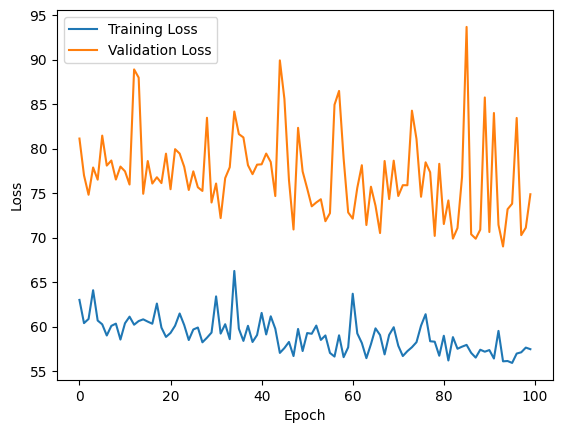

In [303]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



Calculate Test Loss

In [242]:
test_loss = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 60.6642
Test Loss: 64.82585906982422


Function for user input to predict the value

In [248]:
def predict_price(model, scaler, date_str, inflation, revenue):

    date_ordinal = datetime.datetime.strptime(date_str, '%Y-%m-%d').toordinal()
    
   
    input_data = np.array([[date_ordinal, inflation, revenue]])
    
    
    input_data_scaled = scaler.transform(input_data)
    
  
    predicted_price = model.predict(input_data_scaled)
    
    return predicted_price[0][0]


date_str = '2024-06-28'  
inflation = 3.0         
revenue = 61860000000.0       
predicted_price = predict_price(model, scaler, date_str, inflation, revenue)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [249]:
print(f'Predicted Price: ${predicted_price:.2f}')


Predicted Price: $437.08


Calculated Model Accuracy with different methods

In [245]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R² Score: {r2:.2f}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step
Mean Absolute Error (MAE): 4.98
Mean Squared Error (MSE): 64.83
Root Mean Squared Error (RMSE): 8.05
R² Score: 1.00
